In [1]:
import pandas as pd
import statistics as s
import scipy.stats as ss
import numpy as np

### Session 6 - 11/04/2020

In [2]:
df = pd.read_csv("Salary.csv")

#### Display outliers in salary

In [3]:
q1 = df['salary'].quantile(.25)
q3 = df['salary'].quantile(.75)
iqr = q3 - q1

outliers = []

for n in df['salary']:
    if n < (q1-(1.5*iqr)) or n > (q3+(1.5*iqr)):
        outliers.append(n)

print(f"Number of outliers = {len(outliers)}, Outliers = {outliers}")

Number of outliers = 0, Outliers = []


#### Display outliers in experience

In [4]:
q1 = df['exp'].quantile(.25)
q3 = df['exp'].quantile(.75)
iqr = q3 - q1

outliers = []

for n in df['exp']:
    if n < (q1-(1.5*iqr)) or n > (q3+(1.5*iqr)):
        outliers.append(n)

print(f"Number of outliers = {len(outliers)}, Outliers = {outliers}")

Number of outliers = 0, Outliers = []


#### Use persons.csv and display mean, median, stddev, IQR for height and weight

In [5]:
dp = pd.read_csv("persons.csv")
print(f"Number of observations/rows = {len(dp)}")
dp.head()
print(f"Mean Height = {dp['Height'].mean()}, Mean Weight = {dp['Weight'].mean()}")
print(f"Median Height = {dp['Height'].median()}, Median Weight = {dp['Weight'].median()}")
print(f"StdDev Height = {s.stdev(dp['Height'])}, StdDev Weight = {s.stdev(dp['Weight'])}")
print(f"IQR Height = {ss.iqr(dp['Height'])}, IQR Weight = {ss.iqr(dp['Weight'])}")

Number of observations/rows = 500
Mean Height = 169.944, Mean Weight = 106.0
Median Height = 170.5, Median Weight = 106.0
StdDev Height = 16.375260679593755, StdDev Weight = 32.38260746964435
IQR Height = 28.0, IQR Weight = 56.0


### Session 7 - 13/04/2020

#### For persons.csv, find out:
1. Skewness in height
1. Skewness in weight
1. Draw box plots for height and weight
1. Draw scatter plot for height and weight

In [6]:
print("Skewness in height",ss.skew(dp['Height']))
print("Skewness in weight",ss.skew(dp['Weight']))

Skewness in height -0.12154764352037799
Skewness in weight -0.037579065848604216


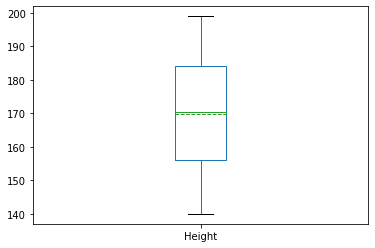

In [7]:
dp['Height'].plot.box(showmeans=True,meanline=True)

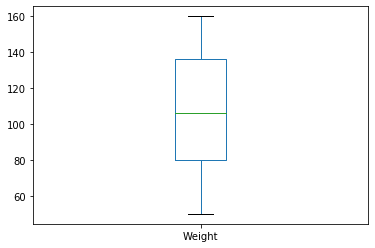

In [8]:
dp['Weight'].plot.box(showmeans=True,meanline=True)

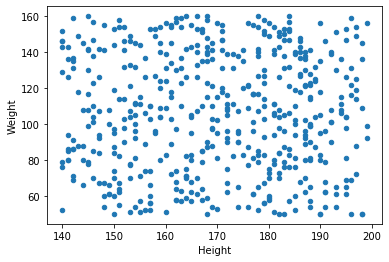

In [9]:
dp.plot.scatter(x='Height',y='Weight')

#### Think of data where you have negative correlation

- If the train speed increases, duration of travel reduces
- As the slope of the road/hill increases, speed of a cyclist or walker decreases
- As the car gets older, the insurance amount decreases as IDV decreases
- As house gets older, the value decreases

### Session 8 - 14/04/2020

#### Consider ages (in years), sizes (in sqft) and prices (in lakhs INR) for 10 houses and calculate the price based on size and age.

#### Create sample data

In [10]:
sizes = [2400,2000,2600,1200,1670,1550,3000,2400,1400,3200]  # SQFT
ages =  [5,6,2,10,11,7,5,6,8,1]    # Years
prices = [20,18,28,12,14,16,22,20,14,32]  # Lakhs

#### Find out correlation

In [11]:
ss.pearsonr(sizes,prices)

(0.9029830039945833, 0.00034426284729547447)

In [12]:
ss.pearsonr(ages,prices)

(-0.9507988998204894, 2.4154732242001204e-05)

#### Calculate slope and intercept

In [13]:
size_reg = ss.linregress(sizes, prices)
size_reg

LinregressResult(slope=0.008404259343319715, intercept=1.5980764866091697, rvalue=0.9029830039945835, pvalue=0.00034426284729547143, stderr=0.0014138920170457116)

In [14]:
age_reg = ss.linregress(ages, prices)
age_reg

LinregressResult(slope=-1.9302587176602928, intercept=31.374578177727784, rvalue=-0.9507988998204897, pvalue=2.415473224200055e-05, stderr=0.2223696520702189)

In [15]:
size_avg = s.mean(sizes)
age_avg =  s.mean(ages)
price_avg = s.mean(prices)

In [16]:
intercept = price_avg - size_reg.slope * size_avg  - age_reg.slope * age_avg

In [17]:
# Calculate prices based on reg line for both size and age
for (size,age, price) in zip(sizes,ages,prices):
    p_price = intercept + size * size_reg.slope +  age * age_reg.slope
    # find out the difference between predicted and actual 
    diff = p_price - price
    print(f"{size:5} {age:5} {p_price:8.2f} {price:8.2f} {diff:8.2f}")

 2400     5    23.89    20.00     3.89
 2000     6    18.60    18.00     0.60
 2600     2    31.36    28.00     3.36
 1200    10     4.16    12.00    -7.84
 1670    11     6.17    14.00    -7.83
 1550     7    12.89    16.00    -3.11
 3000     5    28.93    22.00     6.93
 2400     6    21.96    20.00     1.96
 1400     8     9.70    14.00    -4.30
 3200     1    38.34    32.00     6.34


### Session 9 - 15/04/2020

#### Create an array of 5 * 5 with random numbers in the range 1 to 100 and display how many numbers in the array are even numbers.

In [18]:
# Version 1
a = np.random.randint(1,100,(5,5))
print(a)
count = 0
for r in a:
    for v in r:
        if v % 2 == 0:
            #print(v, end=' ')
            count += 1
print(count)

[[85 87 40 81 83]
 [21 50 21 50 43]
 [40 46 23 52 23]
 [ 2 14 18  1 56]
 [62 99 51 47 59]]
11


In [19]:
# Count number of even numbers in 5 * 5 array - Version 2
a = np.random.randint(1,10,(5,5))
# Both work
print(a[ a % 2 == 0].size)
print((a % 2 == 0).sum())

11
11


### Session 10 - 16/04/2020

#### Take an array of 10 elements and increment all even numbers by 1 and odd numbers by 2

In [20]:
a = np.random.randint(1,10,10)
print("Orignial Array : ", a)
even_idx = a % 2 == 0
odd_idx = a % 2 == 1
a[even_idx] = a[even_idx] + 1
a[odd_idx] = a[odd_idx] + 2
print("Modified Array : ",a)

Orignial Array :  [9 6 8 1 6 4 6 6 3 6]
Modified Array :  [11  7  9  3  7  5  7  7  5  7]


#### Display the elements in the array that are greater than the average of the array

In [21]:
a = np.random.randint(1,10,10)
avg = a.mean()
print(a, avg)
a[a > avg]

[5 1 6 3 4 1 1 7 7 3] 3.8


array([5, 6, 4, 7, 7])

#### Take an array of 10 rows with 5 columns (fill it with random numbers) and display average for each row and which row is having highest average (if 2 students got the same highest average, display both the student rows).

In [22]:
a = np.random.randint(50,100,(10,5))
print(a)
avg = a.mean(axis=1)
print("Averages for each row = ", avg)
max_avg = avg.max()
print("Highest average = ", max_avg)
a[a.mean(axis=1) == max_avg]

[[95 55 74 58 81]
 [70 72 99 84 95]
 [51 56 52 59 71]
 [60 73 52 72 94]
 [78 72 75 77 99]
 [99 90 94 70 79]
 [50 92 60 87 97]
 [88 75 71 91 84]
 [68 93 79 73 99]
 [85 63 52 97 89]]
Averages for each row =  [72.6 84.  57.8 70.2 80.2 86.4 77.2 81.8 82.4 77.2]
Highest average =  86.4


array([[99, 90, 94, 70, 79]])

###  Session 11 - 17/04/2020

#### Find a scenario where broadcast is not possible. See whether broadcasting can be achieved by transposing or reshaping.

In [23]:
a = np.random.randint(1,9,(2,4))
b = np.random.randint(1,9,(4,2))
print(a)
print(b)
a + b

[[6 4 2 7]
 [1 5 3 7]]
[[5 3]
 [4 2]
 [8 1]
 [7 4]]


ValueError: operands could not be broadcast together with shapes (2,4) (4,2) 

In [ ]:
a + b.T

#### Take 2 arrays of 5 * 5 and display how many corresponding elements in both arrays are having same values

In [ ]:
a = np.random.randint(1,15,(5,5))
b = np.random.randint(1,15,(5,5))
print(a)
print(b)
(a == b).sum()  # Count number of elements with same values in corresponding positions

In [ ]:
# Print all values and positions
count = 0
for i in range(0,5):
    for j in range(0,5):
        if a[i,j] == b[i,j]:
            print(f"At [{i},{j}], value = {a[i,j]}")
            count += 1 
print(count)

#### Find out whether you get a view or a copy for boolean indexing

In [ ]:
a = np.array([1,2,3,4,5])
b = a[a % 2 == 0]

In [ ]:
print(a)
b[0] = 10
print(b)
print(a)

##### a is not affected by changing b; therefore, a copy is created for boolean indexing

### Session 12 - 18/04/2020

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image
from scipy import misc

#### Take an image, split it into two halves vertically and interchange those two parts (hint: split & stack in reverse order). 

In [ ]:
raccoon = misc.face()
img1, img2 = np.vsplit(raccoon,2)
new_img = np.vstack((img2,img1))
plt.imshow(new_img)

#### Load an image and interchange red with green.

In [ ]:
raccoon = misc.face()
r_img = raccoon.copy()
for p in r_img:
    for n in p:
        n[0],n[1] = n[1], n[0]  # Swap red and green
plt.imshow(r_img)

In [ ]:
# Another way to swap red and green
raccoon = misc.face()
img = raccoon.copy()
red = img[:,:,0].copy()
green = img[:,:,1].copy()
img[:,:,1] = red
img[:,:,0] = green
plt.imshow(img)

In [ ]:
# Verification
raccoon[0,0], img[0,0]

### Session 13 - 20/04/2020

In [26]:
cdf = pd.read_json("https://restcountries.eu/rest/v2/all")

In [ ]:
cdf.head()

### Session 14 - 21/04/2020

#### Display country names in regions - Asia, Africa and Europe

In [ ]:
cdf.loc[cdf['region'].isin(['Asia','Africa','Europe']),['name','region']]

#### Display top 5 countries based on population

In [ ]:
cdf.nlargest(5,'population')[['name','population']]

#### Display country name, population, region for countries where area of the country is more than 500000 sq. kms.

In [ ]:
cdf.loc[cdf['area'] > 500000,['name','population','region']]

#### Display 5 largest countries and 5 smallest countries in terms of area. Ignore countries without area.

In [ ]:
cdf[cdf['area'].notna()].nlargest(5,'area')[['name','area']]

In [ ]:
cdf[cdf['area'].notna()].nsmallest(5,'area')[['name','area']]

#### Display highest area and the population of that country

In [27]:
cdf.nlargest(1,'area')[['name','area','population']]

,name,area,population
185,Russian Federation,17124442.0,146599183


#### Display countries where the name starts with 'I'

In [28]:
cdf[cdf['name'].str.startswith('I')]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
103,Iceland,[.is],IS,ISL,[354],Reykjavík,"[IS, Island, Republic of Iceland, Lýðveldið Ís...",Europe,Northern Europe,334300,...,[UTC],[],Ísland,352.0,"[{'code': 'ISK', 'name': 'Icelandic króna', 's...","[{'iso639_1': 'is', 'iso639_2': 'isl', 'name':...","{'de': 'Island', 'es': 'Islandia', 'fr': 'Isla...",https://restcountries.eu/data/isl.svg,"[{'acronym': 'EFTA', 'name': 'European Free Tr...",ISL
104,India,[.in],IN,IND,[91],New Delhi,"[IN, Bhārat, Republic of India, Bharat Ganrajya]",Asia,Southern Asia,1295210000,...,[UTC+05:30],"[AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA]",भारत,356.0,"[{'code': 'INR', 'name': 'Indian rupee', 'symb...","[{'iso639_1': 'hi', 'iso639_2': 'hin', 'name':...","{'de': 'Indien', 'es': 'India', 'fr': 'Inde', ...",https://restcountries.eu/data/ind.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",IND
105,Indonesia,[.id],ID,IDN,[62],Jakarta,"[ID, Republic of Indonesia, Republik Indonesia]",Asia,South-Eastern Asia,258705000,...,"[UTC+07:00, UTC+08:00, UTC+09:00]","[TLS, MYS, PNG]",Indonesia,360.0,"[{'code': 'IDR', 'name': 'Indonesian rupiah', ...","[{'iso639_1': 'id', 'iso639_2': 'ind', 'name':...","{'de': 'Indonesien', 'es': 'Indonesia', 'fr': ...",https://restcountries.eu/data/idn.svg,"[{'acronym': 'ASEAN', 'name': 'Association of ...",INA
107,Iran (Islamic Republic of),[.ir],IR,IRN,[98],Tehran,"[IR, Islamic Republic of Iran, Jomhuri-ye Eslā...",Asia,Southern Asia,79369900,...,[UTC+03:30],"[AFG, ARM, AZE, IRQ, PAK, TUR, TKM]",ایران,364.0,"[{'code': 'IRR', 'name': 'Iranian rial', 'symb...","[{'iso639_1': 'fa', 'iso639_2': 'fas', 'name':...","{'de': 'Iran', 'es': 'Iran', 'fr': 'Iran', 'ja...",https://restcountries.eu/data/irn.svg,[],IRI
108,Iraq,[.iq],IQ,IRQ,[964],Baghdad,"[IQ, Republic of Iraq, Jumhūriyyat al-‘Irāq]",Asia,Western Asia,37883543,...,[UTC+03:00],"[IRN, JOR, KWT, SAU, SYR, TUR]",العراق,368.0,"[{'code': 'IQD', 'name': 'Iraqi dinar', 'symbo...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Irak', 'es': 'Irak', 'fr': 'Irak', 'ja...",https://restcountries.eu/data/irq.svg,"[{'acronym': 'AL', 'name': 'Arab League', 'oth...",IRQ
109,Ireland,[.ie],IE,IRL,[353],Dublin,"[IE, Éire, Republic of Ireland, Poblacht na hÉ...",Europe,Northern Europe,6378000,...,[UTC],[GBR],Éire,372.0,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'ga', 'iso639_2': 'gle', 'name':...","{'de': 'Irland', 'es': 'Irlanda', 'fr': 'Irlan...",https://restcountries.eu/data/irl.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",IRL
110,Isle of Man,[.im],IM,IMN,[44],Douglas,"[IM, Ellan Vannin, Mann, Mannin]",Europe,Northern Europe,84497,...,[UTC+00:00],[],Isle of Man,833.0,"[{'code': 'GBP', 'name': 'British pound', 'sym...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Insel Man', 'es': 'Isla de Man', 'fr':...",https://restcountries.eu/data/imn.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",
111,Israel,[.il],IL,ISR,[972],Jerusalem,"[IL, State of Israel, Medīnat Yisrā'el]",Asia,Western Asia,8527400,...,[UTC+02:00],"[EGY, JOR, LBN, SYR]",יִשְׂרָאֵל,376.0,"[{'code': 'ILS', 'name': 'Israeli new shekel',...","[{'iso639_1': 'he', 'iso639_2': 'heb', 'name':...","{'de': 'Israel', 'es': 'Israel', 'fr': 'Israël...",https://restcountries.eu/data/isr.svg,[],ISR
112,Italy,[.it],IT,ITA,[39],Rome,"[IT, Italian Republic, Repubblica italiana]",Europe,Southern Europe,60665551,...,[UTC+01:00],"[AUT, FRA, SMR, SVN, CHE, VAT]",Italia,380.0,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'it', 'iso639_2': 'ita', 'name':...","{'de': 'Italien', 'es': 'Italia', 'fr': 'Itali...",https://restcountries.eu/data/ita.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",ITA


#### Connect to sqlite database - Use query (read_sql_query) or table (read_sql_table) and create a dataframe

In [ ]:
## to be implemented 

### Session 15 - 22/04/2020

#### Display country name and names of countries with which the country shares borders (codes).

In [63]:
cdf.apply(lambda s: f"{s['name']:20s} {','.join(s['borders']):30s}", axis=1)

0      Afghanistan          IRN,PAK,TKM,UZB,TJK,CHN  ...
1      Åland Islands                                 ...
2      Albania              MNE,GRC,MKD,KOS          ...
3      Algeria              TUN,LBY,NER,ESH,MRT,MLI,M...
4      American Samoa                                ...
                             ...                        
245    Wallis and Futuna                             ...
246    Western Sahara       DZA,MRT,MAR              ...
247    Yemen                OMN,SAU                  ...
248    Zambia               AGO,BWA,COD,MWI,MOZ,NAM,T...
249    Zimbabwe             BWA,MOZ,ZAF,ZMB          ...
Length: 250, dtype: object

In [65]:
## Another way to print name and borders
for i in range(0,len(cdf)):
    print(f"{cdf.iloc[i]['name']:30s} - {','.join(cdf.iloc[i]['borders'])}")

Afghanistan                    - IRN,PAK,TKM,UZB,TJK,CHN
Åland Islands                  - 
Albania                        - MNE,GRC,MKD,KOS
Algeria                        - TUN,LBY,NER,ESH,MRT,MLI,MAR
American Samoa                 - 
Andorra                        - FRA,ESP
Angola                         - COG,COD,ZMB,NAM
Anguilla                       - 
Antarctica                     - 
Antigua and Barbuda            - 
Argentina                      - BOL,BRA,CHL,PRY,URY
Armenia                        - AZE,GEO,IRN,TUR
Aruba                          - 
Australia                      - 
Austria                        - CZE,DEU,HUN,ITA,LIE,SVK,SVN,CHE
Azerbaijan                     - ARM,GEO,IRN,RUS,TUR
Bahamas                        - 
Bahrain                        - 
Bangladesh                     - MMR,IND
Barbados                       - 
Belarus                        - LVA,LTU,POL,RUS,UKR
Belgium                        - FRA,DEU,LUX,NLD
Belize                         - GTM,MEX

#### Select countries where language English is spoken

In [44]:
cdf['languages'][0]

[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name': 'Pashto', 'nativeName': 'پښتو'},
 {'iso639_1': 'uz',
  'iso639_2': 'uzb',
  'name': 'Uzbek',
  'nativeName': 'Oʻzbek'},
 {'iso639_1': 'tk',
  'iso639_2': 'tuk',
  'name': 'Turkmen',
  'nativeName': 'Türkmen'}]

In [45]:
# ls is a list of dict
def english_spoken(ls):
    # print(type(ls))
    for d in ls:
        if 'en' in d.values():
            return True
    else:
        return False
    
cdf.loc[cdf['languages'].apply(english_spoken),['name','languages']]

,name,languages
4,American Samoa,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
7,Anguilla,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
8,Antarctica,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
9,Antigua and Barbuda,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
13,Australia,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
16,Bahamas,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
19,Barbados,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
22,Belize,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
24,Bermuda,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
29,Botswana,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."


#### Display country where the density of population is highest

In [46]:
cdf.loc[cdf['population']/cdf['area'] == max(cdf['population']/cdf['area']),['name','population','area']]

,name,population,area
131,Macao,649100,30.0


### Marks DataFrame

In [47]:
mdf = pd.read_csv('marks.csv',header=None,names=['name','subject','marks'])

In [48]:
mdf = mdf.append({'name':'Mark','subject':'Java', 'marks':90}, ignore_index=True)

In [49]:
mdf.loc[11] = ['Mark','Python',88]

In [50]:
mdf['passmark'] = 50

In [51]:
mdf.loc[mdf.subject == 'Python', 'passmark'] = 60  # Change passmark for Python to 60

#### Add a new column called result. Message should be pass/fail based on marks and passmark

In [52]:
def get_result(v):
    if v['marks'] > v['passmark']:
        return 'Pass'
    else:
        return 'Fail'

mdf['result'] = mdf.apply(get_result,axis=1)
mdf

,name,subject,marks,passmark,result
0,Bill,Java,90.0,50,Pass
1,Bill,Python,95.0,60,Pass
2,Steve,Java,80.0,50,Pass
3,Steve,C,90.0,50,Pass
4,Roberts,HTML,98.0,50,Pass
5,Roberts,Java,60.0,50,Pass
6,Roberts,Python,70.0,60,Pass
7,Steve,Python,NaN,60,Fail
8,Henry,NaN,60.0,50,Pass
9,Mark,Java,90.0,50,Pass


#### Create a column called grade. A - if marks >= 80, B - if marks >= 70, C - otherwise, F - for those who failed

In [53]:
def get_grade(g):
    if g.result == 'Fail':
        return 'F'
    elif g.marks >= 80:
        return 'A'
    elif g.marks >= 70:
        return 'B'
    else:
        return 'C'
mdf['grade'] = mdf.apply(get_grade,axis=1)
mdf

,name,subject,marks,passmark,result,grade
0,Bill,Java,90.0,50,Pass,A
1,Bill,Python,95.0,60,Pass,A
2,Steve,Java,80.0,50,Pass,A
3,Steve,C,90.0,50,Pass,A
4,Roberts,HTML,98.0,50,Pass,A
5,Roberts,Java,60.0,50,Pass,C
6,Roberts,Python,70.0,60,Pass,B
7,Steve,Python,NaN,60,Fail,F
8,Henry,NaN,60.0,50,Pass,C
9,Mark,Java,90.0,50,Pass,A


#### Add a new row which contains name, subject amd marks at the end. See how you can manage other fields.

In [54]:
mdf.loc[max(mdf.index)+1] = ['James','Java',75,50, np.nan,np.nan]  

In [55]:
mdf = mdf.append({'name':'James','subject':'Python','marks':85},ignore_index=True) # allows creation of new record with 3 columns

In [56]:
mdf

,name,subject,marks,passmark,result,grade
0,Bill,Java,90.0,50.0,Pass,A
1,Bill,Python,95.0,60.0,Pass,A
2,Steve,Java,80.0,50.0,Pass,A
3,Steve,C,90.0,50.0,Pass,A
4,Roberts,HTML,98.0,50.0,Pass,A
5,Roberts,Java,60.0,50.0,Pass,C
6,Roberts,Python,70.0,60.0,Pass,B
7,Steve,Python,NaN,60.0,Fail,F
8,Henry,NaN,60.0,50.0,Pass,C
9,Mark,Java,90.0,50.0,Pass,A


#### Delete grade and result

In [57]:
mdf.drop(['grade','result'],axis=1) # inplace=True to delete in original df

,name,subject,marks,passmark
0,Bill,Java,90.0,50.0
1,Bill,Python,95.0,60.0
2,Steve,Java,80.0,50.0
3,Steve,C,90.0,50.0
4,Roberts,HTML,98.0,50.0
5,Roberts,Java,60.0,50.0
6,Roberts,Python,70.0,60.0
7,Steve,Python,NaN,60.0
8,Henry,NaN,60.0,50.0
9,Mark,Java,90.0,50.0


### Session 16 - 23/04/2020

#### Create another dataframe with time the exam was taken (time_df - name,subject,time) and join to marks_df on name and subject

In [58]:
time_df = pd.read_csv('time.csv',header=None,names=['name','subject','time'])
time_df

,name,subject,time
0,Bill,Java,60.0
1,Bill,Python,55.0
2,Steve,Java,50.0
3,Steve,C,40.0
4,Roberts,HTML,78.0
5,Roberts,Java,40.0
6,Roberts,Python,45.0
7,Steve,Python,NaN
8,Henry,NaN,55.0


In [59]:
mdf.join(time_df.set_index(['name','subject']),on=['name','subject'])

,name,subject,marks,passmark,result,grade,time
0,Bill,Java,90.0,50.0,Pass,A,60.0
1,Bill,Python,95.0,60.0,Pass,A,55.0
2,Steve,Java,80.0,50.0,Pass,A,50.0
3,Steve,C,90.0,50.0,Pass,A,40.0
4,Roberts,HTML,98.0,50.0,Pass,A,78.0
5,Roberts,Java,60.0,50.0,Pass,C,40.0
6,Roberts,Python,70.0,60.0,Pass,B,45.0
7,Steve,Python,NaN,60.0,Fail,F,NaN
8,Henry,NaN,60.0,50.0,Pass,C,55.0
9,Mark,Java,90.0,50.0,Pass,A,NaN


### Tips DataFrame

In [68]:
import seaborn as sns

In [69]:
tips = sns.load_dataset('tips')

In [62]:
tips['tip_per'] = tips['tip'] / tips['total_bill'] * 100

#### Display top 10 bill amounts

In [63]:
tips.nlargest(10,'total_bill')

,total_bill,tip,sex,smoker,day,time,size,tip_per
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
212,48.33,9.00,Male,No,Sat,Dinner,4,18.621974
59,48.27,6.73,Male,No,Sat,Dinner,4,13.942407
156,48.17,5.00,Male,No,Sun,Dinner,6,10.379905
182,45.35,3.50,Male,Yes,Sun,Dinner,3,7.717751
102,44.30,2.50,Female,Yes,Sat,Dinner,3,5.643341
197,43.11,5.00,Female,Yes,Thur,Lunch,4,11.598237
142,41.19,5.00,Male,No,Thur,Lunch,5,12.138869
184,40.55,3.00,Male,Yes,Sun,Dinner,2,7.398274
95,40.17,4.73,Male,Yes,Fri,Dinner,4,11.774956


#### Display top 5 tip amounts for smokers

In [64]:
tips[tips['smoker'] == 'Yes'].nlargest(5,'tip')

,total_bill,tip,sex,smoker,day,time,size,tip_per
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.681165
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517
214,28.17,6.50,Female,Yes,Sat,Dinner,3,23.074192
181,23.33,5.65,Male,Yes,Sun,Dinner,2,24.217745
211,25.89,5.16,Male,Yes,Sat,Dinner,4,19.930475


#### Display average bill amount for female on Sunday

In [65]:
tips[(tips['sex'] == 'Female') & (tips['day'] == 'Sun')].mean()['total_bill']

19.87222222222222

#### Display average bill amount per person for male and female

In [66]:
tips.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

#### Display the 10 transactions in which customers were the most generous

In [67]:
tips.nlargest(10,'tip_per')

,total_bill,tip,sex,smoker,day,time,size,tip_per
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.952481
149,7.51,2.00,Male,No,Thur,Lunch,2,26.631158
93,16.32,4.30,Female,Yes,Fri,Dinner,2,26.348039
221,13.42,3.48,Female,Yes,Fri,Lunch,2,25.931446
51,10.29,2.60,Female,No,Sun,Dinner,2,25.267250


#### Find out on which day we had more customers

In [68]:
day_group = tips.groupby('day').sum()['size']

In [69]:
day_group

day
Thur    152
Fri      40
Sat     219
Sun     216
Name: size, dtype: int64

In [70]:
day_group[day_group == day_group.max()]

day
Sat    219
Name: size, dtype: int64

#### Display top 3 transactions based on bill amount for each day

In [71]:
day_group = tips.groupby('day')
# First element is group and second one is row in that group
for g,trans in day_group:
    print(g)
    print(trans.sort_values(by='total_bill', ascending=False).head(3))

Thur
     total_bill   tip     sex smoker   day   time  size    tip_per
197       43.11  5.00  Female    Yes  Thur  Lunch     4  11.598237
142       41.19  5.00    Male     No  Thur  Lunch     5  12.138869
85        34.83  5.17  Female     No  Thur  Lunch     4  14.843526
Fri
    total_bill   tip   sex smoker  day    time  size    tip_per
95       40.17  4.73  Male    Yes  Fri  Dinner     4  11.774956
90       28.97  3.00  Male    Yes  Fri  Dinner     2  10.355540
96       27.28  4.00  Male    Yes  Fri  Dinner     2  14.662757
Sat
     total_bill    tip   sex smoker  day    time  size    tip_per
170       50.81  10.00  Male    Yes  Sat  Dinner     3  19.681165
212       48.33   9.00  Male     No  Sat  Dinner     4  18.621974
59        48.27   6.73  Male     No  Sat  Dinner     4  13.942407
Sun
     total_bill  tip   sex smoker  day    time  size    tip_per
156       48.17  5.0  Male     No  Sun  Dinner     6  10.379905
182       45.35  3.5  Male    Yes  Sun  Dinner     3   7.717751
184

### Session 17 - 24/04/2020

#### Display top 3 countries with highest population in each region

In [78]:
region_group = cdf[(cdf['region'] != '')].groupby('region')
# First element is group and second one is row in that group
for g,ctry in region_group:
    print(g)
    print(ctry.sort_values(by='population', ascending=False)[['name','population']].head(3))

Africa
         name  population
162   Nigeria   186988000
72   Ethiopia    92206005
67      Egypt    91290000
Americas
                         name  population
239  United States of America   323947000
31                     Brazil   206135893
144                    Mexico   122273473
Asia
          name  population
48       China  1377422166
104      India  1295210000
105  Indonesia   258705000
Europe
                   name  population
185  Russian Federation   146599183
84              Germany    81770900
77               France    66710000
Oceania
                 name  population
13          Australia    24117360
173  Papua New Guinea     8083700
159       New Zealand     4697854
Polar
         name  population
8  Antarctica        1000


#### Ratio of each day's total_bill to the total_bill for all days

In [70]:
total = tips['total_bill'].sum()
tips.groupby('day')['total_bill'].sum()/total

day
Thur    0.227088
Fri     0.067501
Sat     0.368369
Sun     0.337042
Name: total_bill, dtype: float64

#### Which continent is the largest?

In [78]:
region_groups = cdf.groupby('region')['area'].sum()
region_groups.sort_values(ascending=False).head(1)

region
Americas    42248044.36
Name: area, dtype: float64

#### Display the columns that contain no null values

In [75]:
mdf.loc[:,mdf.notna().all()]

,name
0,Bill
1,Bill
2,Steve
3,Steve
4,Roberts
5,Roberts
6,Roberts
7,Steve
8,Henry
9,Mark


#### Display rows that have no null values

In [76]:
mdf.loc[mdf.notna().all(axis=1),:]

,name,subject,marks,passmark,result,grade
0,Bill,Java,90.0,50.0,Pass,A
1,Bill,Python,95.0,60.0,Pass,A
2,Steve,Java,80.0,50.0,Pass,A
3,Steve,C,90.0,50.0,Pass,A
4,Roberts,HTML,98.0,50.0,Pass,A
5,Roberts,Java,60.0,50.0,Pass,C
6,Roberts,Python,70.0,60.0,Pass,B
9,Mark,Java,90.0,50.0,Pass,A
10,Mark,Python,88.0,60.0,Pass,A
